In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv('/content/iris_dataset.csv')
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
MEAN=df['sepal length'].mean()
STD=df['sepal length'].std()

MEAN ,STD

(np.float64(5.843333333333334), 0.8280661279778629)

In [45]:
df['sepal length'] = df['sepal length'] > STD*2

cond = df['sepal length'] == True
df[cond]


,sepal length,sepal width,petal length,petal width,target
0,True,3.5,1.4,0.2,Iris-setosa
1,True,3.0,1.4,0.2,Iris-setosa
2,True,3.2,1.3,0.2,Iris-setosa
3,True,3.1,1.5,0.2,Iris-setosa
4,True,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,True,3.0,5.2,2.3,Iris-virginica
146,True,2.5,5.0,1.9,Iris-virginica
147,True,3.0,5.2,2.0,Iris-virginica
148,True,3.4,5.4,2.3,Iris-virginica


<Axes: >

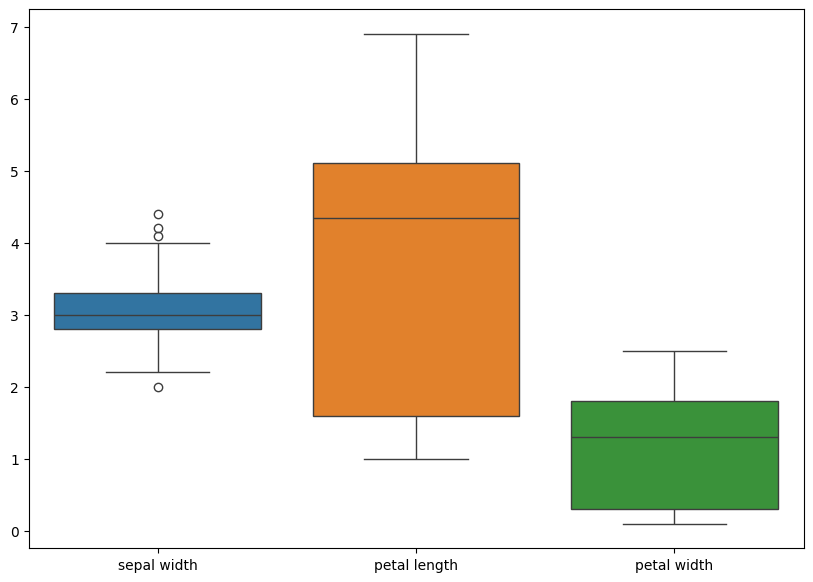

In [46]:
cond = df.select_dtypes(include=np.number)
cond
fig = plt.figure(figsize =(10, 7))
sns.boxplot(cond)



In [47]:
spl = df['petal width']
zscores = (spl - spl.mean())/spl.std()
zscores

,petal width
0,-1.308593
1,-1.308593
2,-1.308593
3,-1.308593
4,-1.308593
...,...
145,1.443121
146,0.918985
147,1.050019
148,1.443121


In [48]:
dis = df.describe()
dis

,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


In [49]:
Q1= dis['sepal width']['25%']
Q3= dis['sepal width']['75%']

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_cond = df['sepal width'] >= upper
lower_cond = df['sepal width'] <= lower



upper_len = len(df[upper_cond])
lower_len = len(df[lower_cond])

upper_len , lower_len

(3, 1)

In [50]:
Q1= dis['petal width']['25%']
Q3= dis['petal width']['75%']

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_cond = df['petal width'] >= upper
lower_cond = df['petal width'] <= lower



drop = df[upper_cond | lower_cond]
drop
drop.shape

(0, 5)

In [51]:



    # Confusion Matrix
    #cm = confusion_matrix(y_test, preds)
    #plt.figure(figsize=(5,4))
    #plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #plt.title(f"Confusion Matrix: {name}")
    #plt.xlabel('Predicted label')
    #plt.ylabel('True label')
    #plt.xticks(np.arange(len(target_names)), target_names, rotation=45)
    #plt.yticks(np.arange(len(target_names)), target_names)
    #thresh = cm.max() / 2.
    #for i in range(cm.shape[0]):
    #    for j in range(cm.shape[1]):
     #       plt.text(j, i, format(cm[i, j], 'd'),
     #                ha="center", va="center",
      #               color="white" if cm[i, j] > thresh else "black")
    #plt.tight_layout()
    #plt.show()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [53]:
X = pd.DataFrame(df.drop('target', axis=1))
y = pd.Series(df.target)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [56]:
models = {
    "SVC": SVC(kernel='rbf', random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [57]:

for name, model in models.items():
   model.fit(X_train_s, y_train)
   preds = model.predict(X_test_s)
   acc = accuracy_score(y_test, preds)


In [58]:
print(f"Model: {name}")
print(f"Accuracy: {acc:.4f}")
print("Classification Report:\n", classification_report(y_test, preds))

Model: RandomForest
Accuracy: 1.0000
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

